implement kernel density estimation for the one-dimensional dataset produced by the code snippet
below. Specifically, implement
1. the Parzen window (try different window sizes),
2. the Gaussian kernel (try different kernel widths), and
3. the k-nearest neighbors approach (try different values for k)

Matplotlib is building the font cache; this may take a moment.


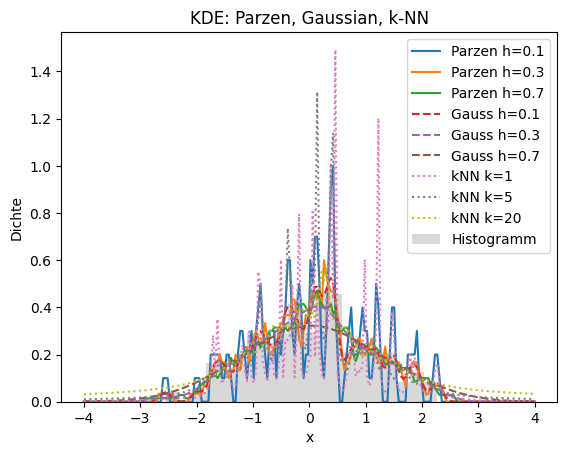

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Beispiel-Datensatz erzeugen
np.random.seed(0)
data = np.random.randn(100)

# 1. Parzen Window (Rechteck-Kernel)
def parzen_window_estimate(x, data, h):
    n = len(data)
    return np.sum(np.abs((x - data) / h) <= 0.5) / (n * h)

# 2. Gaussian Kernel Density Estimation
def gaussian_kernel_estimate(x, data, h):
    n = len(data)
    return np.sum(np.exp(-0.5 * ((x - data) / h) ** 2) / (np.sqrt(2 * np.pi) * h)) / n

# 3. k-Nearest Neighbors Density Estimation
def knn_density_estimate(x, data, k):
    n = len(data)
    distances = np.abs(data - x)
    d_k = np.partition(distances, k)[k]
    return k / (n * 2 * d_k)

# Plotten der Schätzungen
x_vals = np.linspace(-4, 4, 200)

# Parzen Window für verschiedene Fensterbreiten
for h in [0.1, 0.3, 0.7]:
    y_parzen = [parzen_window_estimate(x, data, h) for x in x_vals]
    plt.plot(x_vals, y_parzen, label=f'Parzen h={h}')

# Gaussian Kernel für verschiedene Bandbreiten
for h in [0.1, 0.3, 0.7]:
    y_gauss = [gaussian_kernel_estimate(x, data, h) for x in x_vals]
    plt.plot(x_vals, y_gauss, '--', label=f'Gauss h={h}')

# k-NN für verschiedene k
for k in [1, 5, 20]:
    y_knn = [knn_density_estimate(x, data, k) for x in x_vals]
    plt.plot(x_vals, y_knn, ':', label=f'kNN k={k}')

plt.hist(data, bins=20, density=True, alpha=0.3, color='gray', label='Histogramm')
plt.legend()
plt.title('KDE: Parzen, Gaussian, k-NN')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.show()